<a href="https://colab.research.google.com/github/Div123-star/Team-Montreux-Jazz-Festival/blob/main/INSR_Bioactivity_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computational Drug Discovery [Part 1]

## **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.
[Data as of March 25, 2020; ChEMBL version 26].

## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 701.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


## **Importing libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for INSR**

In [ ]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('INSR')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Insulin_receptor', 'xref_name': ...",Homo sapiens,Insulin receptor,16.0,False,CHEMBL1981,"[{'accession': 'P06213', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P15208', 'xref_name': None, 'xre...",Mus musculus,Insulin receptor,16.0,False,CHEMBL3187,"[{'accession': 'P15208', 'component_descriptio...",SINGLE PROTEIN,10090
2,"[{'xref_id': 'P15127', 'xref_name': None, 'xre...",Rattus norvegicus,Insulin receptor,16.0,False,CHEMBL5486,"[{'accession': 'P15127', 'component_descriptio...",SINGLE PROTEIN,10116
3,"[{'xref_id': 'P08069', 'xref_name': None, 'xre...",Homo sapiens,Insulin-like growth factor I receptor,11.0,False,CHEMBL1957,"[{'accession': 'P08069', 'component_descriptio...",SINGLE PROTEIN,9606
4,"[{'xref_id': 'Q60751', 'xref_name': None, 'xre...",Mus musculus,Insulin-like growth factor 1 receptor,11.0,False,CHEMBL5381,"[{'accession': 'Q60751', 'component_descriptio...",SINGLE PROTEIN,10090
5,"[{'xref_id': 'P14616', 'xref_name': None, 'xre...",Homo sapiens,Insulin receptor-related protein,11.0,False,CHEMBL5483,"[{'accession': 'P14616', 'component_descriptio...",SINGLE PROTEIN,9606
6,"[{'xref_id': 'P24062', 'xref_name': None, 'xre...",Rattus norvegicus,Insulin-like growth factor 1 receptor,11.0,False,CHEMBL1075098,"[{'accession': 'P24062', 'component_descriptio...",SINGLE PROTEIN,10116
7,[],Homo sapiens,VHL/Insulin-like growth factor 1 receptor,11.0,False,CHEMBL4748221,"[{'accession': 'P08069', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606


### **Select and retrieve bioactivity data for *Human INSR* (first entry)**

We will assign the fifth entry (which corresponds to the target protein, *Human Acetylcholinesterase*) to the ***selected_target*** variable 

In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1981'

Here, we will retrieve only bioactivity data for *Human Acetylcholinesterase* (CHEMBL220) that are reported as pChEMBL values.

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,271228,[],CHEMBL699131,Inhibition of insulin receptor (InsR) tyrosine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,uM,UO_0000065,None,50.0
1,None,271233,[],CHEMBL699131,Inhibition of insulin receptor (InsR) tyrosine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,271240,[],CHEMBL699131,Inhibition of insulin receptor (InsR) tyrosine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,uM,UO_0000065,None,50.0


Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

## **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-14-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,271228,[],CHEMBL699131,Inhibition of insulin receptor (InsR) tyrosine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,uM,UO_0000065,None,50.0
1,None,271233,[],CHEMBL699131,Inhibition of insulin receptor (InsR) tyrosine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,271240,[],CHEMBL699131,Inhibition of insulin receptor (InsR) tyrosine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,273533,[],CHEMBL699142,Inhibition of insulin receptor autophosphoryla...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,uM,UO_0000065,None,200.0
4,None,278590,[],CHEMBL699131,Inhibition of insulin receptor (InsR) tyrosine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,uM,UO_0000065,None,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,None,23297802,[],CHEMBL4841282,Inhibition of IR (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,nM,UO_0000065,None,1000.0
1685,None,23372766,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884731,InSR(INSRLGY1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,pIC50,None,UO_0000065,None,6.0
1686,None,23373175,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4885022,InSR(INSRLGY1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,pIC50,None,UO_0000065,None,6.0
1687,None,23373536,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4885313,InSR(INSRLGY1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,pIC50,None,UO_0000065,None,6.0


In [ ]:
df.to_csv('INSR_01_bioactivity_data.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
!mkdir "/content/gdrive/MyDrive/Colab Notebooks/data"

In [ ]:
!cp INSR_01_bioactivity_data.csv "/content/gdrive/MyDrive/Colab Notebooks/data"

In [ ]:
!ls "/content/gdrive/MyDrive/Colab Notebooks/data"

INSR_01_bioactivity_data.csv


In [ ]:
len(df2.canonical_smiles.unique())

1345

In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,271228,[],CHEMBL699131,Inhibition of insulin receptor (InsR) tyrosine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,uM,UO_0000065,None,50.0
1,None,271233,[],CHEMBL699131,Inhibition of insulin receptor (InsR) tyrosine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,271240,[],CHEMBL699131,Inhibition of insulin receptor (InsR) tyrosine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,273533,[],CHEMBL699142,Inhibition of insulin receptor autophosphoryla...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,uM,UO_0000065,None,200.0
4,None,278590,[],CHEMBL699131,Inhibition of insulin receptor (InsR) tyrosine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,uM,UO_0000065,None,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,None,23297802,[],CHEMBL4841282,Inhibition of IR (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,IC50,nM,UO_0000065,None,1000.0
1685,None,23372766,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884731,InSR(INSRLGY1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,pIC50,None,UO_0000065,None,6.0
1686,None,23373175,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4885022,InSR(INSRLGY1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,pIC50,None,UO_0000065,None,6.0
1687,None,23373536,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4885313,InSR(INSRLGY1) Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Insulin receptor,9606,None,None,pIC50,None,UO_0000065,None,6.0


## **Data pre-processing of the bioactivity data**

### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL57323,Cc1cccc(C)c1-c1cc2cnc(N)nc2nc1NC(=O)NC(C)(C)C,50000.0
1,CHEMBL57347,CN1CCN(CCCNc2ncc3cc(-c4c(Cl)cccc4Cl)c(NC(=O)NC...,50000.0
2,CHEMBL75188,Cc1cc(C)c(C)c(-c2cc3cnc(NCCCN4CCN(C)CC4)nc3nc2...,50000.0
3,CHEMBL26001,O=P(O)(O)C(O)c1ccc2ccccc2c1,200000.0
4,CHEMBL76599,CC(C)(C)NC(=O)Nc1nc2nc(N)ncc2cc1-c1ccccc1,50000.0
...,...,...,...
1684,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,1000.0
1685,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0
1686,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0
1687,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,1000.0


Saves dataframe to CSV file

In [ ]:
df3.to_csv('INSR_02_bioactivity_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [ ]:
df4 = pd.read_csv('INSR_02_bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL57323,Cc1cccc(C)c1-c1cc2cnc(N)nc2nc1NC(=O)NC(C)(C)C,50000.0,inactive
1,CHEMBL57347,CN1CCN(CCCNc2ncc3cc(-c4c(Cl)cccc4Cl)c(NC(=O)NC...,50000.0,inactive
2,CHEMBL75188,Cc1cc(C)c(C)c(-c2cc3cnc(NCCCN4CCN(C)CC4)nc3nc2...,50000.0,inactive
3,CHEMBL26001,O=P(O)(O)C(O)c1ccc2ccccc2c1,200000.0,inactive
4,CHEMBL76599,CC(C)(C)NC(=O)Nc1nc2nc(N)ncc2cc1-c1ccccc1,50000.0,inactive
...,...,...,...,...
1340,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,1000.0,active
1341,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0,active
1342,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0,active
1343,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,1000.0,active


Saves dataframe to CSV file

In [ ]:
df5.to_csv('INSR_03_bioactivity_data_curated.csv', index=False)

In [ ]:
!cp INSR_02_bioactivity_data_preprocessed.csv "/content/gdrive/MyDrive/Colab Notebooks/data"

In [ ]:
!cp INSR_03_bioactivity_data_curated.csv "/content/gdrive/MyDrive/Colab Notebooks/data"

In [ ]:
! zip INSR.zip *.csv

  adding: INSR_01_bioactivity_data.csv (deflated 91%)
  adding: INSR_02_bioactivity_data_preprocessed.csv (deflated 83%)
  adding: INSR_03_bioactivity_data_curated.csv (deflated 84%)


In [ ]:
! ls -l

total 1192
drwx------ 5 root root   4096 May 22 08:32 gdrive
-rw-r--r-- 1 root root 844003 May 22 08:45 INSR_01_bioactivity_data.csv
-rw-r--r-- 1 root root 115393 May 22 09:30 INSR_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root 127310 May 22 09:34 INSR_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root 113985 May 22 09:35 INSR.zip
drwxr-xr-x 1 root root   4096 May 18 13:38 sample_data


In [ ]:
df = pd.read_csv('INSR_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL57323,Cc1cccc(C)c1-c1cc2cnc(N)nc2nc1NC(=O)NC(C)(C)C,50000.0,inactive
1,CHEMBL57347,CN1CCN(CCCNc2ncc3cc(-c4c(Cl)cccc4Cl)c(NC(=O)NC...,50000.0,inactive
2,CHEMBL75188,Cc1cc(C)c(C)c(-c2cc3cnc(NCCCN4CCN(C)CC4)nc3nc2...,50000.0,inactive
3,CHEMBL26001,O=P(O)(O)C(O)c1ccc2ccccc2c1,200000.0,inactive
4,CHEMBL76599,CC(C)(C)NC(=O)Nc1nc2nc(N)ncc2cc1-c1ccccc1,50000.0,inactive
...,...,...,...,...
1340,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,1000.0,active
1341,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0,active
1342,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0,active
1343,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,1000.0,active


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL57323,50000.0,inactive,Cc1cccc(C)c1-c1cc2cnc(N)nc2nc1NC(=O)NC(C)(C)C
1,CHEMBL57347,50000.0,inactive,CN1CCN(CCCNc2ncc3cc(-c4c(Cl)cccc4Cl)c(NC(=O)NC...
2,CHEMBL75188,50000.0,inactive,Cc1cc(C)c(C)c(-c2cc3cnc(NCCCN4CCN(C)CC4)nc3nc2...
3,CHEMBL26001,200000.0,inactive,O=P(O)(O)C(O)c1ccc2ccccc2c1
4,CHEMBL76599,50000.0,inactive,CC(C)(C)NC(=O)Nc1nc2nc(N)ncc2cc1-c1ccccc1
...,...,...,...,...
1340,CHEMBL4876497,1000.0,active,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...
1341,CHEMBL4088216,1000.0,active,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...
1342,CHEMBL4549667,1000.0,active,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...
1343,CHEMBL4097778,1000.0,active,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!conda install -c rdkit rdkit

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

# All requested packages already installed.



In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,364.453,3.81084,3.0,5.0
1,545.519,4.96800,3.0,7.0
2,532.737,4.89488,3.0,7.0
3,238.179,2.00840,3.0,2.0
4,336.399,3.19400,3.0,5.0
...,...,...,...,...
1340,378.863,4.73222,3.0,4.0
1341,402.454,2.35370,0.0,5.0
1342,481.350,3.11620,0.0,5.0
1343,458.540,1.13020,0.0,7.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,364.453,3.81084,3.0,5.0
1,545.519,4.96800,3.0,7.0
2,532.737,4.89488,3.0,7.0
3,238.179,2.00840,3.0,2.0
4,336.399,3.19400,3.0,5.0
...,...,...,...,...
1340,378.863,4.73222,3.0,4.0
1341,402.454,2.35370,0.0,5.0
1342,481.350,3.11620,0.0,5.0
1343,458.540,1.13020,0.0,7.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL57323,Cc1cccc(C)c1-c1cc2cnc(N)nc2nc1NC(=O)NC(C)(C)C,50000.0,inactive
1,CHEMBL57347,CN1CCN(CCCNc2ncc3cc(-c4c(Cl)cccc4Cl)c(NC(=O)NC...,50000.0,inactive
2,CHEMBL75188,Cc1cc(C)c(C)c(-c2cc3cnc(NCCCN4CCN(C)CC4)nc3nc2...,50000.0,inactive
3,CHEMBL26001,O=P(O)(O)C(O)c1ccc2ccccc2c1,200000.0,inactive
4,CHEMBL76599,CC(C)(C)NC(=O)Nc1nc2nc(N)ncc2cc1-c1ccccc1,50000.0,inactive
...,...,...,...,...
1340,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,1000.0,active
1341,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0,active
1342,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0,active
1343,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,1000.0,active


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL57323,Cc1cccc(C)c1-c1cc2cnc(N)nc2nc1NC(=O)NC(C)(C)C,50000.0,inactive,364.453,3.81084,3.0,5.0
1,CHEMBL57347,CN1CCN(CCCNc2ncc3cc(-c4c(Cl)cccc4Cl)c(NC(=O)NC...,50000.0,inactive,545.519,4.96800,3.0,7.0
2,CHEMBL75188,Cc1cc(C)c(C)c(-c2cc3cnc(NCCCN4CCN(C)CC4)nc3nc2...,50000.0,inactive,532.737,4.89488,3.0,7.0
3,CHEMBL26001,O=P(O)(O)C(O)c1ccc2ccccc2c1,200000.0,inactive,238.179,2.00840,3.0,2.0
4,CHEMBL76599,CC(C)(C)NC(=O)Nc1nc2nc(N)ncc2cc1-c1ccccc1,50000.0,inactive,336.399,3.19400,3.0,5.0
...,...,...,...,...,...,...,...,...
1340,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,1000.0,active,378.863,4.73222,3.0,4.0
1341,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0,active,402.454,2.35370,0.0,5.0
1342,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0,active,481.350,3.11620,0.0,5.0
1343,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,1000.0,active,458.540,1.13020,0.0,7.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm',axis=1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()


count    1.345000e+03
mean     8.440069e+04
std      2.042949e+06
min      4.000000e-01
25%      1.000000e+02
50%      1.092000e+03
75%      1.000000e+04
max      7.100000e+07
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value',axis=1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL57323,Cc1cccc(C)c1-c1cc2cnc(N)nc2nc1NC(=O)NC(C)(C)C,inactive,364.453,3.81084,3.0,5.0,50000.0
1,CHEMBL57347,CN1CCN(CCCNc2ncc3cc(-c4c(Cl)cccc4Cl)c(NC(=O)NC...,inactive,545.519,4.96800,3.0,7.0,50000.0
2,CHEMBL75188,Cc1cc(C)c(C)c(-c2cc3cnc(NCCCN4CCN(C)CC4)nc3nc2...,inactive,532.737,4.89488,3.0,7.0,50000.0
3,CHEMBL26001,O=P(O)(O)C(O)c1ccc2ccccc2c1,inactive,238.179,2.00840,3.0,2.0,200000.0
4,CHEMBL76599,CC(C)(C)NC(=O)Nc1nc2nc(N)ncc2cc1-c1ccccc1,inactive,336.399,3.19400,3.0,5.0,50000.0
...,...,...,...,...,...,...,...,...
1340,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,active,378.863,4.73222,3.0,4.0,1000.0
1341,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,1000.0
1342,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,1000.0
1343,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,active,458.540,1.13020,0.0,7.0,1000.0


In [ ]:
df_norm.standard_value_norm.describe()

count    1.345000e+03
mean     8.440069e+04
std      2.042949e+06
min      4.000000e-01
25%      1.000000e+02
50%      1.092000e+03
75%      1.000000e+04
max      7.100000e+07
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL57323,Cc1cccc(C)c1-c1cc2cnc(N)nc2nc1NC(=O)NC(C)(C)C,inactive,364.453,3.81084,3.0,5.0,4.30103
1,CHEMBL57347,CN1CCN(CCCNc2ncc3cc(-c4c(Cl)cccc4Cl)c(NC(=O)NC...,inactive,545.519,4.96800,3.0,7.0,4.30103
2,CHEMBL75188,Cc1cc(C)c(C)c(-c2cc3cnc(NCCCN4CCN(C)CC4)nc3nc2...,inactive,532.737,4.89488,3.0,7.0,4.30103
3,CHEMBL26001,O=P(O)(O)C(O)c1ccc2ccccc2c1,inactive,238.179,2.00840,3.0,2.0,3.69897
4,CHEMBL76599,CC(C)(C)NC(=O)Nc1nc2nc(N)ncc2cc1-c1ccccc1,inactive,336.399,3.19400,3.0,5.0,4.30103
...,...,...,...,...,...,...,...,...
1340,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,active,378.863,4.73222,3.0,4.0,6.00000
1341,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.00000
1342,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.00000
1343,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,active,458.540,1.13020,0.0,7.0,6.00000


In [ ]:
df_final.pIC50.describe()


count    1345.000000
mean        5.926106
std         1.170577
min         1.148742
25%         5.000000
50%         5.961777
75%         7.000000
max         9.397940
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [ ]:
df_final.to_csv('INSR_04_bioactivity_data_class_pIC50.csv')

In [ ]:
!cp INSR_04_bioactivity_data_3class_pIC50.csv "/content/gdrive/MyDrive/Colab Notebooks/data"

In [ ]:
!ls "/content/gdrive/MyDrive/Colab Notebooks/data" 

INSR_01_bioactivity_data.csv
INSR_02_bioactivity_data_preprocessed.csv
INSR_03_bioactivity_data_curated.csv
INSR_04_bioactivity_data_3class_pIC50.csv


### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL57323,Cc1cccc(C)c1-c1cc2cnc(N)nc2nc1NC(=O)NC(C)(C)C,inactive,364.453,3.81084,3.0,5.0,4.30103
1,CHEMBL57347,CN1CCN(CCCNc2ncc3cc(-c4c(Cl)cccc4Cl)c(NC(=O)NC...,inactive,545.519,4.96800,3.0,7.0,4.30103
2,CHEMBL75188,Cc1cc(C)c(C)c(-c2cc3cnc(NCCCN4CCN(C)CC4)nc3nc2...,inactive,532.737,4.89488,3.0,7.0,4.30103
3,CHEMBL26001,O=P(O)(O)C(O)c1ccc2ccccc2c1,inactive,238.179,2.00840,3.0,2.0,3.69897
4,CHEMBL76599,CC(C)(C)NC(=O)Nc1nc2nc(N)ncc2cc1-c1ccccc1,inactive,336.399,3.19400,3.0,5.0,4.30103
...,...,...,...,...,...,...,...,...
1340,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,active,378.863,4.73222,3.0,4.0,6.00000
1341,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.00000
1342,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.00000
1343,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,active,458.540,1.13020,0.0,7.0,6.00000


Let's write this to CSV file.

In [ ]:
df_2class.to_csv('INSR_05_bioactivity_data_class_pIC50.csv')

In [ ]:
!cp INSR_05_bioactivity_data_class_pIC50.csv "/content/gdrive/MyDrive/Colab Notebooks/data"

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

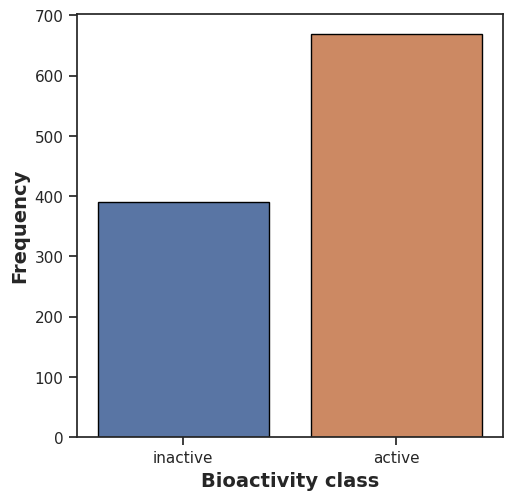

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

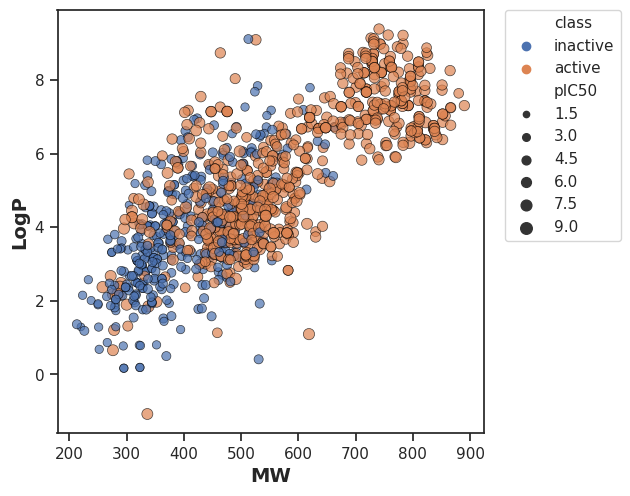

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

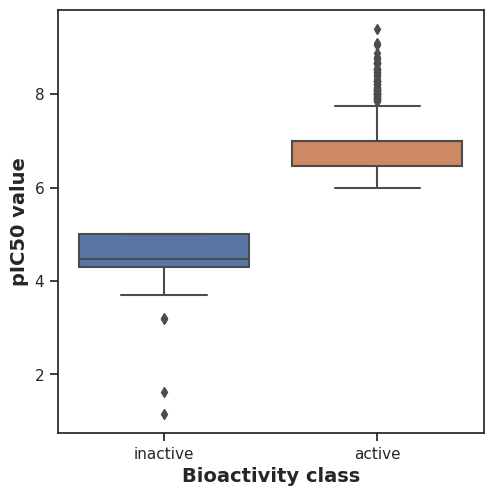

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,260910.0,4.313432e-165,0.05,Different distribution (reject H0)


#### **MW**

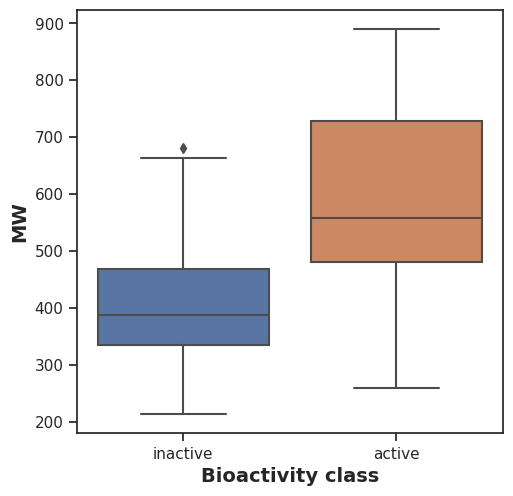

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,222680.5,3.016655e-82,0.05,Different distribution (reject H0)


#### **LogP**

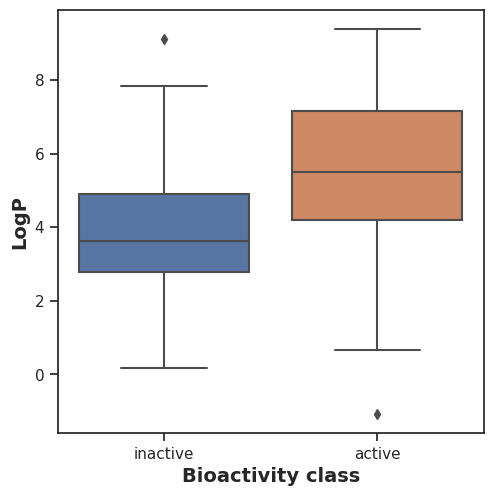

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,202554.0,5.577793e-51,0.05,Different distribution (reject H0)


#### **NumHDonors**

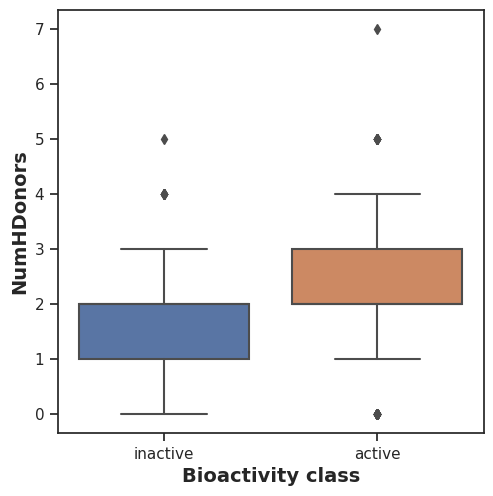

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,161399.0,5.715310e-12,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

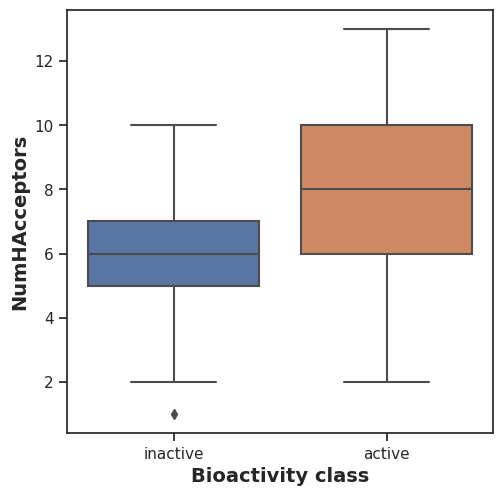

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,204945.0,4.335516e-55,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_MW.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: INSR_04_bioactivity_data_3class_pIC50.csv (deflated 78%)
  adding: INSR_01_bioactivity_data.csv (deflated 91%)
  adding: INSR_04_bioactivity_data_class_pIC50.csv (deflated 78%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: INSR_02_bioactivity_data_preprocessed.csv (deflated 83%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: INSR_03_bioactivity_data_curated.csv (deflated 84%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: INSR_05_bioactivity_data_class_pIC50.csv (deflated 78%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 4%)
  adding: mannwhitneyu_MW.csv (deflated 10%)


Computational Drug Discovery [Part 3] Descriptor Calculation and Dataset Preparation

## **Download PaDEL-Descriptor**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-05-22 11:15:53--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-05-22 11:15:53--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  70.1MB/s    in 0.4s    

2023-05-22 11:15:55 (70.1 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-05-22 11:15:55--  https://git

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

## **Load bioactivity data**

Download the curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Bioinformatics Project series. Here we will be using the **bioactivity_data_3class_pIC50.csv** file that essentially contain the pIC50 values that we will be using for building a regression model.

In [ ]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv

--2023-05-22 11:18:18--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 655414 (640K) [text/plain]
Saving to: ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv’

acetylcholinesteras 100%[===================>] 640.05K  --.-KB/s    in 0.1s    

2023-05-22 11:18:19 (6.03 MB/s) - ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv’ saved [655414/655414]



In [ ]:
df3 = pd.read_csv('INSR_04_bioactivity_data_class_pIC50.csv')

In [ ]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL57323,Cc1cccc(C)c1-c1cc2cnc(N)nc2nc1NC(=O)NC(C)(C)C,inactive,364.453,3.81084,3.0,5.0,4.30103
1,1,CHEMBL57347,CN1CCN(CCCNc2ncc3cc(-c4c(Cl)cccc4Cl)c(NC(=O)NC...,inactive,545.519,4.96800,3.0,7.0,4.30103
2,2,CHEMBL75188,Cc1cc(C)c(C)c(-c2cc3cnc(NCCCN4CCN(C)CC4)nc3nc2...,inactive,532.737,4.89488,3.0,7.0,4.30103
3,3,CHEMBL26001,O=P(O)(O)C(O)c1ccc2ccccc2c1,inactive,238.179,2.00840,3.0,2.0,3.69897
4,4,CHEMBL76599,CC(C)(C)NC(=O)Nc1nc2nc(N)ncc2cc1-c1ccccc1,inactive,336.399,3.19400,3.0,5.0,4.30103
...,...,...,...,...,...,...,...,...,...
1340,1340,CHEMBL4876497,Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3Cl...,active,378.863,4.73222,3.0,4.0,6.00000
1341,1341,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.00000
1342,1342,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.00000
1343,1343,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,active,458.540,1.13020,0.0,7.0,6.00000


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

Cc1cccc(C)c1-c1cc2cnc(N)nc2nc1NC(=O)NC(C)(C)C	CHEMBL57323
CN1CCN(CCCNc2ncc3cc(-c4c(Cl)cccc4Cl)c(NC(=O)NC(C)(C)C)nc3n2)CC1	CHEMBL57347
Cc1cc(C)c(C)c(-c2cc3cnc(NCCCN4CCN(C)CC4)nc3nc2NC(=O)NC(C)(C)C)c1C	CHEMBL75188
O=P(O)(O)C(O)c1ccc2ccccc2c1	CHEMBL26001
CC(C)(C)NC(=O)Nc1nc2nc(N)ncc2cc1-c1ccccc1	CHEMBL76599


In [ ]:
! cat molecule.smi | wc -l

1345


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [ ]:
! cat padel.sh


java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL57323 in molecule.smi (1/1345). 
Processing CHEMBL57347 in molecule.smi (2/1345). 
Processing CHEMBL75188 in molecule.smi (3/1345). Average speed: 9.38 s/mol.
Processing CHEMBL26001 in molecule.smi (4/1345). Average speed: 4.98 s/mol.
Processing CHEMBL76599 in molecule.smi (5/1345). Average speed: 5.61 s/mol.
Processing CHEMBL299026 in molecule.smi (6/1345). Average speed: 3.17 s/mol.
Processing CHEMBL299763 in molecule.smi (7/1345). Average speed: 2.58 s/mol.
Processing CHEMBL45827 in molecule.smi (8/1345). Average speed: 2.43 s/mol.
Processing CHEMBL56236 in molecule.smi (9/1345). Average speed: 2.45 s/mol.
Processing CHEMBL57366 in molecule.smi (10/1345). Average speed: 2.04 s/mol.
Processing CHEMBL432738 in molecule.smi (11/1345). Average speed: 1.82 s/mol.
Processing CHEMBL301483 in molecule.smi (12/1345). Average speed: 1.73 s/mol.
Processing CHEMBL75680 in molecule.smi (13/1345). Average speed: 1.58 s/mol.
Processing CHEMBL327300 in molecule.smi (14/1345). Avera

In [ ]:
! ls -l

total 30804
-rw-r--r-- 1 root root   655414 May 22 11:18 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root    20651 May 22 09:58 condacolab_install.log
-rw-r--r-- 1 root root  2402295 May 22 11:46 descriptors_output.csv
drwx------ 5 root root     4096 May 22 08:32 gdrive
-rw-r--r-- 1 root root   844003 May 22 10:08 INSR_01_bioactivity_data.csv
-rw-r--r-- 1 root root   115393 May 22 10:08 INSR_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root   127310 May 22 10:08 INSR_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   198464 May 22 10:49 INSR_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root   198464 May 22 10:52 INSR_04_bioactivity_data_class_pIC50.csv
-rw-r--r-- 1 root root   153713 May 22 10:56 INSR_05_bioactivity_data_class_pIC50.csv
-rw-r--r-- 1 root root   113985 May 22 09:35 INSR.zip
drwxr-xr-x 3 root root     4096 May 22 11:16 __MACOSX
-rw-r--r-- 1 root root      124 May 22 11:03 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root ro

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')


In [ ]:
df3_X


,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL57323,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL57347,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL26001,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL76599,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL75188,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,CHEMBL4088216,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1341,CHEMBL4876497,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1342,CHEMBL4097778,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1343,CHEMBL4549667,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1341,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1342,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1343,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [ ]:
df3_Y = df3['pIC50']
df3_Y

0       4.30103
1       4.30103
2       4.30103
3       3.69897
4       4.30103
         ...   
1340    6.00000
1341    6.00000
1342    6.00000
1343    6.00000
1344    8.00000
Name: pIC50, Length: 1345, dtype: float64

## **Combining X and Y variable**

In [ ]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30103
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30103
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30103
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.69897
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.00000
1341,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.00000
1342,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.00000
1343,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.00000


In [161]:
dataset3.to_csv('INSR_06_bioactivity_data_class_pIC50.csv', index=False)


In [ ]:
!cp INSR_06_bioactivity_data_class_pIC50.csv "/content/gdrive/MyDrive/Colab Notebooks/data" 

# **Let's download the CSV file to your local computer for the Part 3B (Model Building).**

Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df= dataset3

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1341,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1342,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1343,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [ ]:
Y = df.pIC50
Y

0       4.30103
1       4.30103
2       4.30103
3       3.69897
4       4.30103
         ...   
1340    6.00000
1341    6.00000
1342    6.00000
1343    6.00000
1344    8.00000
Name: pIC50, Length: 1345, dtype: float64

### **3.3. Let's examine the data dimension**

In [ ]:
X.shape

(1345, 881)

In [ ]:
Y.shape

(1345,)

### **3.4. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1345, 158)

## **4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [ ]:
X_train.shape, Y_train.shape


((1076, 158), (1076,))

In [ ]:
X_test.shape, Y_test.shape


((269, 158), (269,))

## **5. Building a Regression Model using Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6716843508813648

In [ ]:
Y_pred = model.predict(X_test)


## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

TypeError: ignored

Computational Drug Discovery [Part 5] Comparing Regressors

Import libraries

In [157]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip upgrade --all

ERROR: unknown command "upgrade"


In [9]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
#from lazypredict.Supervised import LazyRegressor

In [159]:
pip install pandas==0.22

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-0.22.0.tar.gz (11.3 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [1]:
pip install --upgrade lazypredict pandas dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from lazypredict.Supervised import LazyRegressor

In [4]:
import pandas as pd


In [5]:
df = pd.read_csv('INSR_06_bioactivity_data_class_pIC50.csv')

In [6]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [7]:
# Examine X dimension
X.shape

(1345, 881)

In [10]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [11]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [07:29<00:00, 10.70s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [06:38<00:00,  9.49s/it]


In [12]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.94,0.99,0.13,5.08
DecisionTreeRegressor,0.94,0.99,0.13,0.16
ExtraTreeRegressor,0.94,0.99,0.13,0.17
GaussianProcessRegressor,0.94,0.99,0.13,15.70
XGBRegressor,0.85,0.97,0.19,5.95
MLPRegressor,0.70,0.95,0.27,9.24
RandomForestRegressor,0.68,0.94,0.28,5.84
BaggingRegressor,0.56,0.92,0.33,0.51
HistGradientBoostingRegressor,0.52,0.91,0.35,4.91


In [13]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,669752965485449838315175936.00,-1531934954636495419133132800.00,45701855904672.78,0.68
RANSACRegressor,1543103628833554794807296.00,-3529561658488690439094272.00,2193683963061.15,47.04
TransformedTargetRegressor,118698421133735704395776.00,-271500493115596948373504.00,608413700598.27,0.82
LinearRegression,118698421133735704395776.00,-271500493115596948373504.00,608413700598.27,0.77
SGDRegressor,18614028167182620295168.00,-42576116665981140467712.00,240933226969.45,0.19
KernelRidge,12.74,-25.84,6.05,0.22
GaussianProcessRegressor,10.29,-20.26,5.38,6.86
DummyRegressor,1.44,-0.00,1.17,0.06
LassoLars,1.44,-0.00,1.17,0.24


## **5. Data visualization of model performance**

[(0.0, 1.0)]

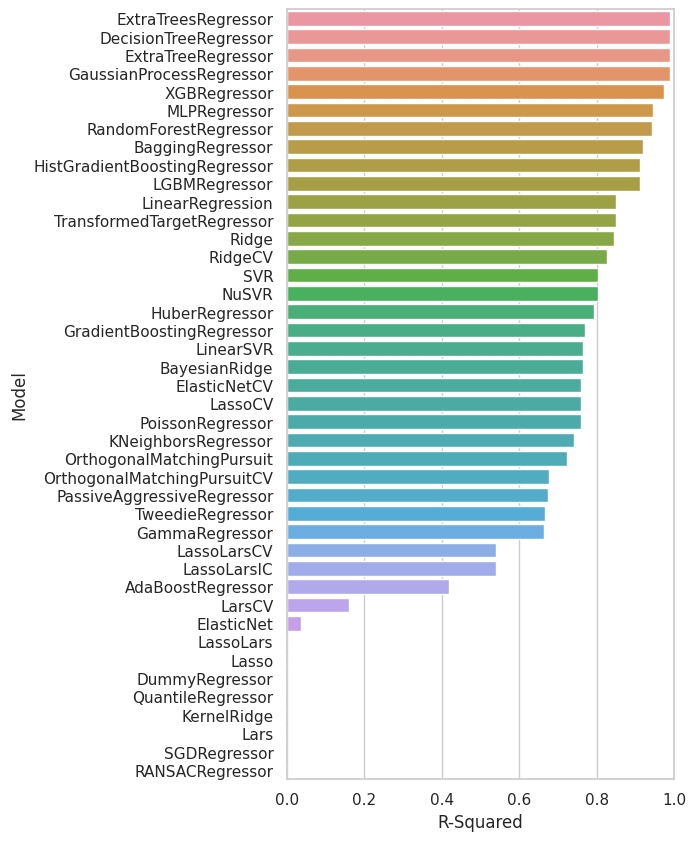

In [14]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

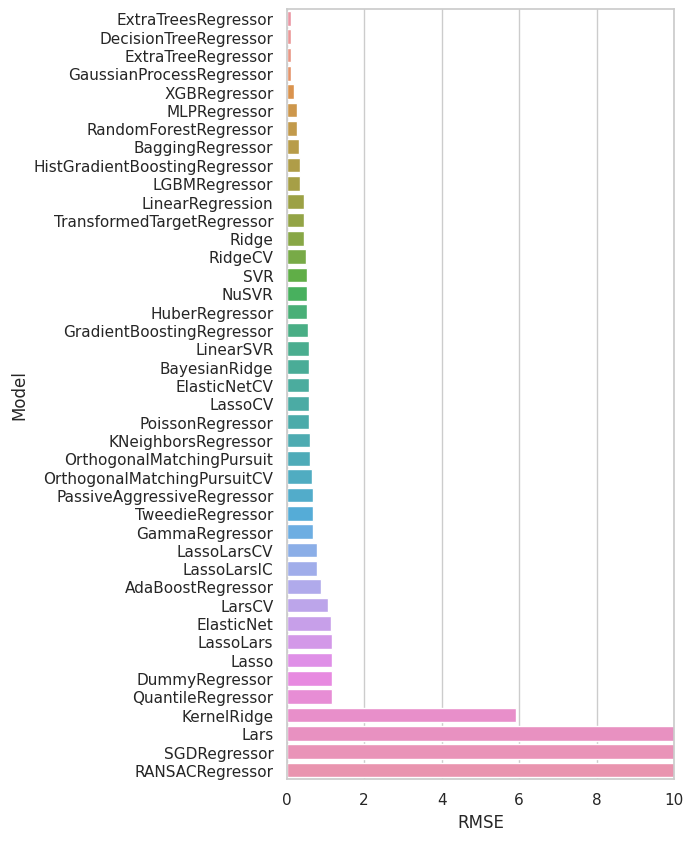

In [15]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

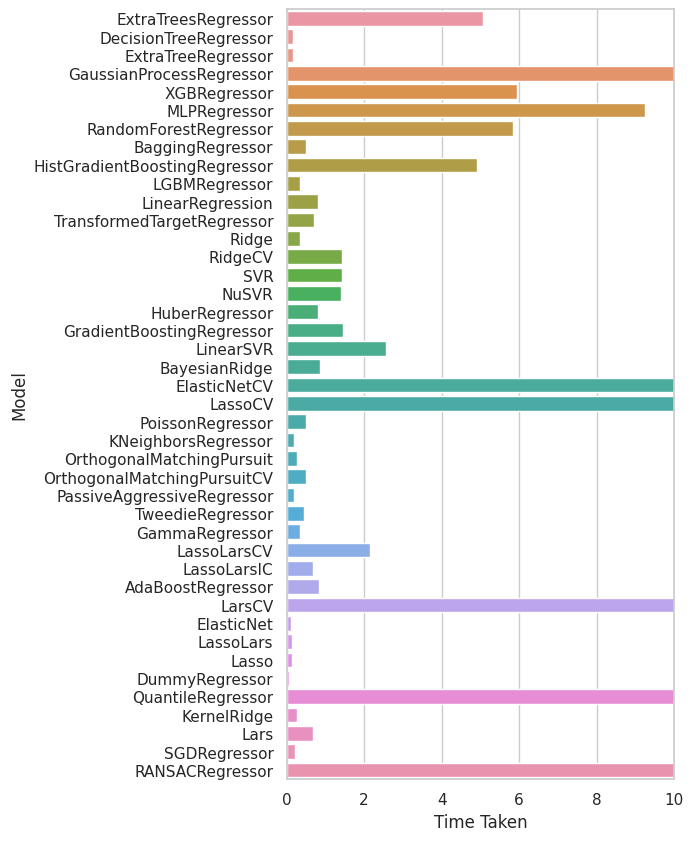

In [16]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

Build model using ExtraTreesregressor and predict PIC50 value

In [18]:
 from sklearn.ensemble import ExtraTreesRegressor

In [19]:

model = ExtraTreesRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.351138367961905

In [26]:
Y_pred = model.predict(X_test)


Scatter plot of Experimental vs Predicted pIC50 Values

<Axes: xlabel='pIC50'>

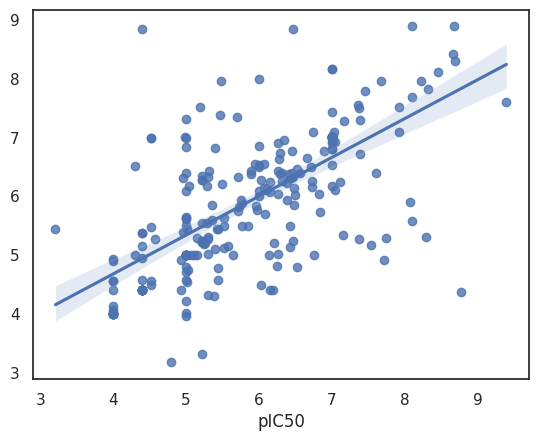

In [25]:
sns.regplot(x=Y_test, y= Y_pred)

---